In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

# Entire Dataset

In [5]:
dataset=pd.read_csv("../Dataset/cleaned_data.csv",index_col=0)

In [6]:
dataset.head()

,Year,Total Multilateral,Total Bilateral,International Monetary Fund,Trade Credit,Total Commercial Borrowings,NRI & FC(B&O) Deposits,Rupee Debt,Total Long-Term Debt
0,1991,40386.0,27378.0,5132.0,8374.0,19727.0,20030.0,25199.0,146226.0
1,1992,68262.0,47603.0,8934.0,12418.0,35711.0,27384.0,31956.0,232268.0
2,1993,77758.0,50258.0,14985.0,13484.0,36367.0,34941.0,33149.0,260942.0
3,1994,82199.0,54580.0,15812.0,16307.0,38782.0,39729.0,31634.0,279043.0
4,1995,89819.0,63761.0,13545.0,20876.0,40915.0,39006.0,30315.0,298237.0


### Dataset column names

In [7]:
dataset.columns

Index(['Year', 'Total Multilateral', 'Total Bilateral',
       ' International Monetary Fund', 'Trade Credit',
       'Total Commercial Borrowings', 'NRI & FC(B&O) Deposits', 'Rupee Debt',
       'Total Long-Term Debt'],
      dtype='object')

# Only 'Total Multilateral' Column

In [15]:
total_multilateral_df = dataset[['Year','Total Multilateral']]

In [16]:
total_multilateral_df.head()

,Year,Total Multilateral
0,1991,40386.0
1,1992,68262.0
2,1993,77758.0
3,1994,82199.0
4,1995,89819.0


In [17]:
total_multilateral_df = total_multilateral_df.set_index(['Year'])
total_multilateral_df.head()

,Total Multilateral
Year,
1991,40386.0
1992,68262.0
1993,77758.0
1994,82199.0
1995,89819.0


# Plot the graph

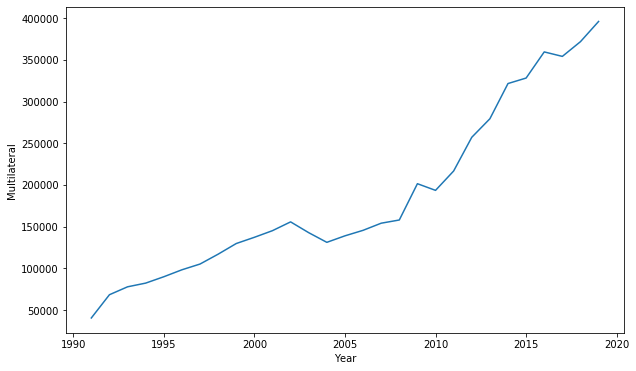

In [19]:
plt.xlabel("Year")
plt.ylabel("Multilateral")
plt.plot(total_multilateral_df)

## Check Stationarity of data

#### Determining rolling statistics

In [44]:
def rollmean_and_rollstd(df):
    # rolling mean
    rollmean = df.rolling(window=3).mean()
    #rolling std
    rollstd = df.rolling(window=3).std()
    return rollmean,rollstd

rollmean,rollstd = rollmean_and_rollstd(total_multilateral_df)
print(rollmean,rollstd)

      Total Multilateral
Year                    
1991                 NaN
1992                 NaN
1993        62135.333333
1994        76073.000000
1995        83258.666667
1996        90063.666667
1997        97686.000000
1998       106714.333333
1999       117217.333333
2000       127906.000000
2001       137306.333333
2002       145956.666667
2003       147807.000000
2004       143140.333333
2005       137561.666667
2006       138501.666667
2007       146151.000000
2008       152485.666667
2009       171126.333333
2010       184254.000000
2011       203844.333333
2012       222398.666667
2013       251023.333333
2014       285986.000000
2015       309672.666667
2016       336399.333333
2017       347251.948667
2018       361796.964000
2019       373968.513333       Total Multilateral
Year                    
1991                 NaN
1992                 NaN
1993        19424.691229
1994         7119.649640
1995         6099.926256
1996         7989.810094
1997         7635.157431


#### Plot rolling Statistics

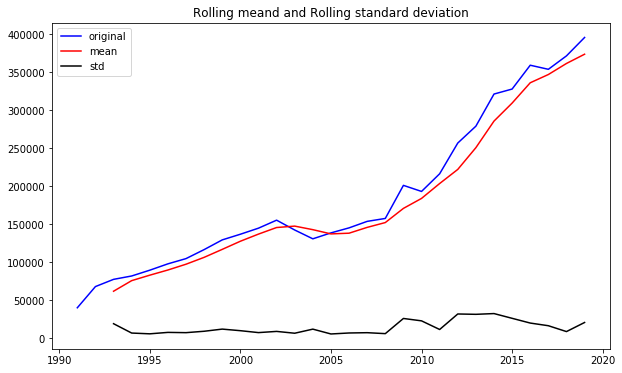

In [39]:
original = plt.plot(total_multilateral_df,color='blue',label='original')
mean = plt.plot(rollmean,color='red',label='mean')
std = plt.plot(rollstd,color='black',label='std')
plt.legend(loc='best')
plt.title('Rolling meand and Rolling standard deviation')
plt.show(block=False)

# Dickey-Fuller Test

In [40]:
from statsmodels.tsa.stattools import adfuller

In [42]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(total_multilateral_df['Total Multilateral'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.208257
p-value                         0.996042
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


# Trend Estimation

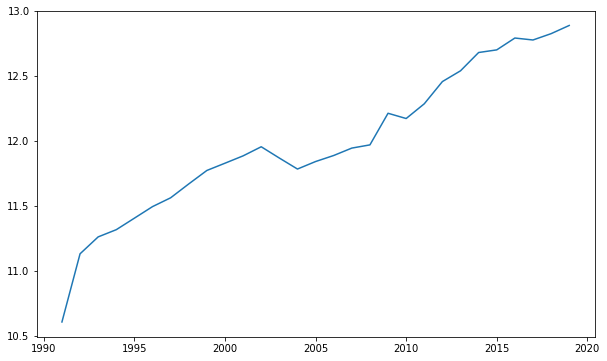

In [43]:
total_multilateral_df_logscale = np.log(total_multilateral_df)
plt.plot(total_multilateral_df_logscale)

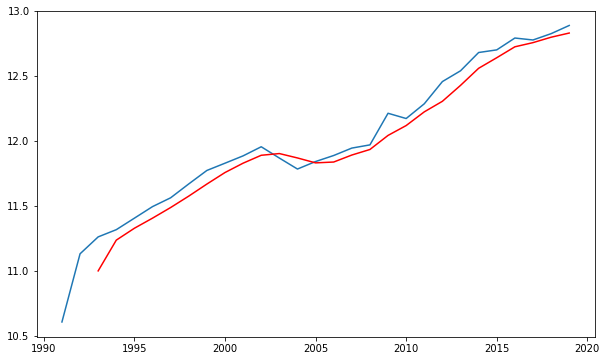

In [45]:
movingAvg, movingStd = rollmean_and_rollstd(total_multilateral_df_logscale)
plt.plot(total_multilateral_df_logscale)
plt.plot(movingAvg,color='red')

In [46]:
logscaleMinusMovingAvg = total_multilateral_df_logscale - movingAvg
logscaleMinusMovingAvg.dropna(inplace=True)
logscaleMinusMovingAvg.head()

,Total Multilateral
Year,
1993,0.261789
1994,0.080444
1995,0.077616
1996,0.088841
1997,0.074883


In [47]:
logscaleMinusMovingAvg.head(10)

,Total Multilateral
Year,
1993,0.261789
1994,0.080444
1995,0.077616
1996,0.088841
1997,0.074883
1998,0.093795
1999,0.104743
2000,0.071817
2001,0.056295


In [52]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

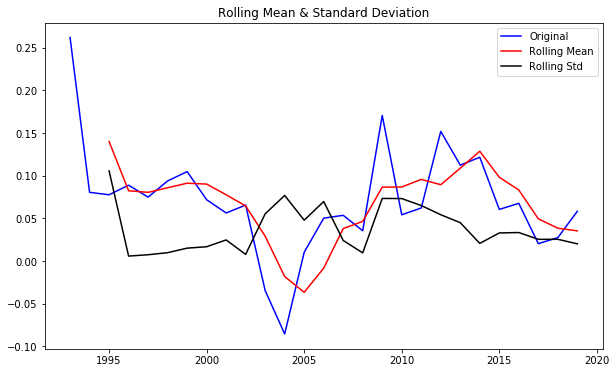

Results of Dickey-Fuller Test:
Test Statistic                 -4.524401
p-value                         0.000178
#Lags Used                      0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [53]:
test_stationarity(logscaleMinusMovingAvg)

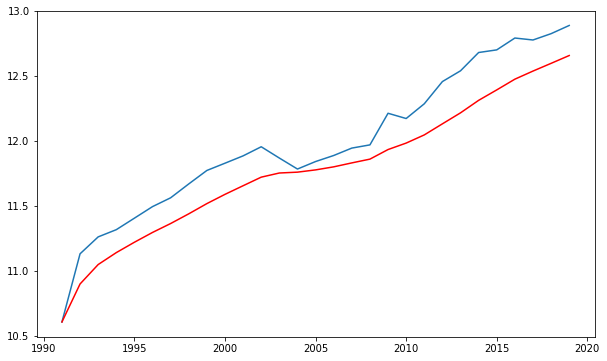

In [55]:
expWeightedAvg = total_multilateral_df_logscale.ewm(halflife=3,min_periods=0,adjust=True).mean()
plt.plot(total_multilateral_df_logscale)
plt.plot(expWeightedAvg,color='red')

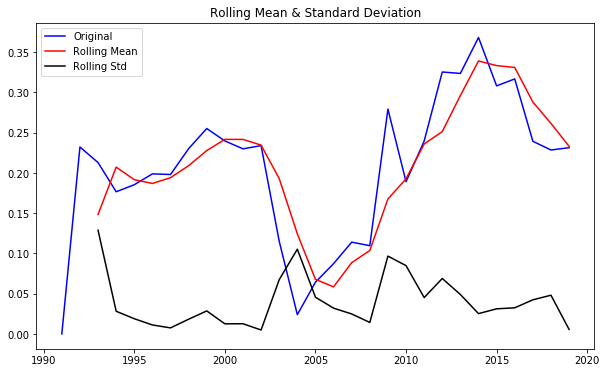

Results of Dickey-Fuller Test:
Test Statistic                 -3.032619
p-value                         0.031958
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [56]:
logscaleMinusexpWeightedAvg = total_multilateral_df_logscale - expWeightedAvg
test_stationarity(logscaleMinusexpWeightedAvg)

# Seasonality 
### Shifting

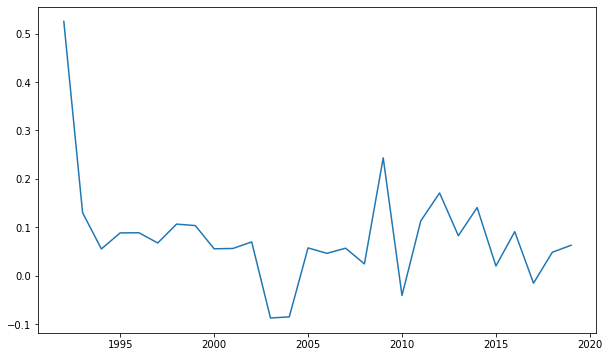

In [57]:
datasetLogDiffShifting = total_multilateral_df_logscale - total_multilateral_df_logscale.shift()
plt.plot(datasetLogDiffShifting)

In [58]:
datasetLogDiffShifting.dropna(inplace=True)

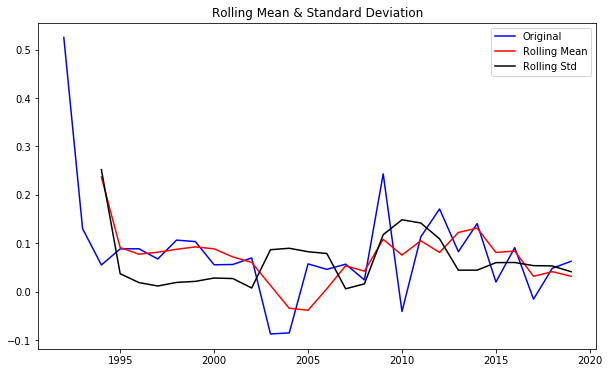

Results of Dickey-Fuller Test:
Test Statistic                -7.452591e+00
p-value                        5.619455e-11
#Lags Used                     0.000000e+00
Number of Observations Used    2.700000e+01
Critical Value (1%)           -3.699608e+00
Critical Value (5%)           -2.976430e+00
Critical Value (10%)          -2.627601e+00
dtype: float64


In [59]:
test_stationarity(datasetLogDiffShifting)

<ipython-input-63-4047da40f7c7>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(total_multilateral_df_logscale,freq=5)


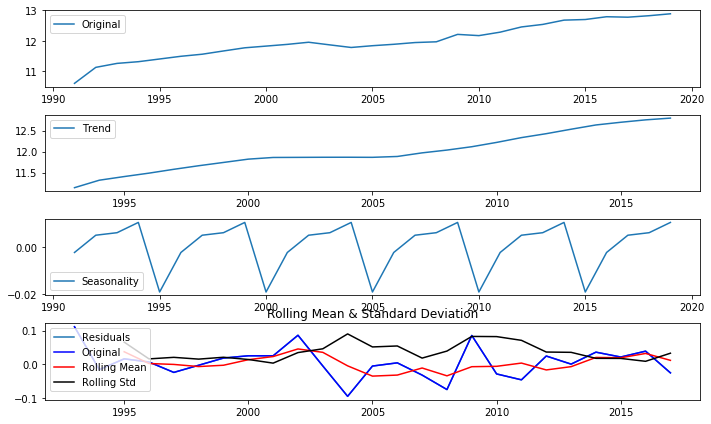

Results of Dickey-Fuller Test:
Test Statistic                 -4.138416
p-value                         0.000836
#Lags Used                      1.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(total_multilateral_df_logscale,freq=5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(total_multilateral_df_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

# AutoCorrelative and Partial AutoCorrelative Graph

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


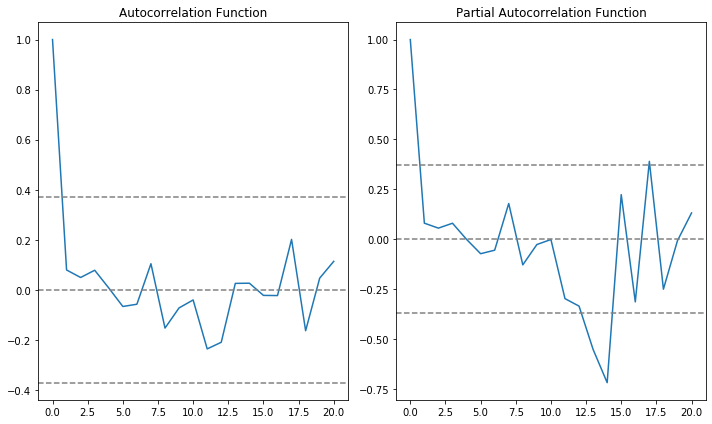

In [64]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Arima Model Implementation

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting AR model


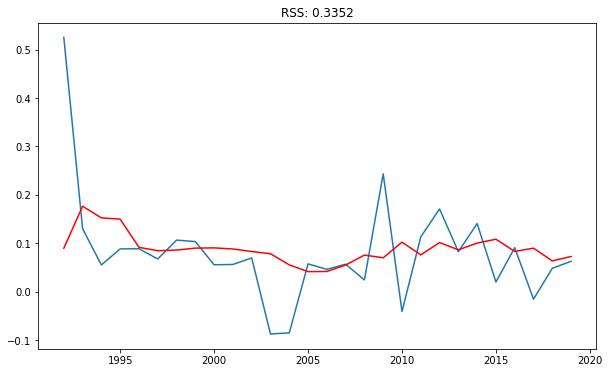

In [90]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(total_multilateral_df_logscale, order=(3,1,0))
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Total Multilateral"])**2))
print('Plotting AR model')

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting AR model


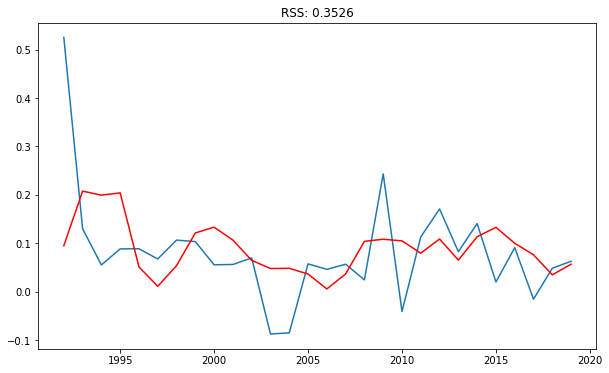

In [85]:
#MA MODEL
model = ARIMA(total_multilateral_df_logscale, order=(0, 1, 4))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Total Multilateral"])**2))
print('Plotting AR model')

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


Text(0.5, 1.0, 'RSS: 0.3634')

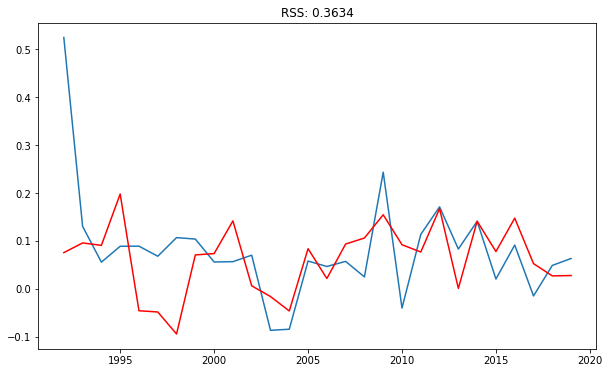

In [92]:
model = ARIMA(total_multilateral_df_logscale, order=(3, 1, 4))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Total Multilateral"])**2))

In [93]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Year
1992    0.075344
1993    0.095638
1994    0.090603
1995    0.197874
1996   -0.046018
dtype: float64


In [94]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Year
1992    0.075344
1993    0.170982
1994    0.261586
1995    0.459460
1996    0.413442
dtype: float64


In [96]:
predictions_ARIMA_log = pd.Series(total_multilateral_df_logscale['Total Multilateral'].iloc[0], index=total_multilateral_df_logscale['Total Multilateral'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
1991    10.606238
1992    10.681582
1993    10.777221
1994    10.867824
1995    11.065698
dtype: float64

Text(0.5, 1.0, 'RMSE: 91901.4928')

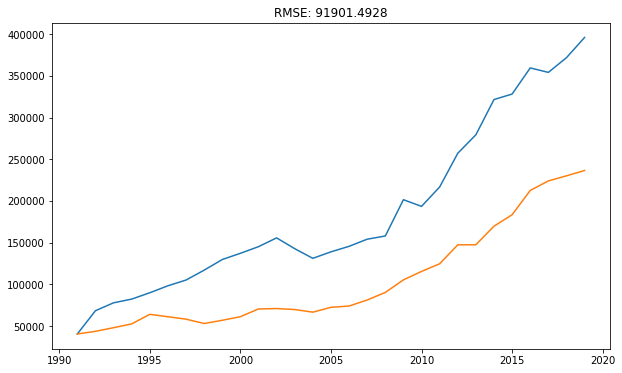

In [97]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(total_multilateral_df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-total_multilateral_df["Total Multilateral"])**2)/len(total_multilateral_df["Total Multilateral"])))

In [99]:
total_multilateral_df.shape

(29, 1)

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


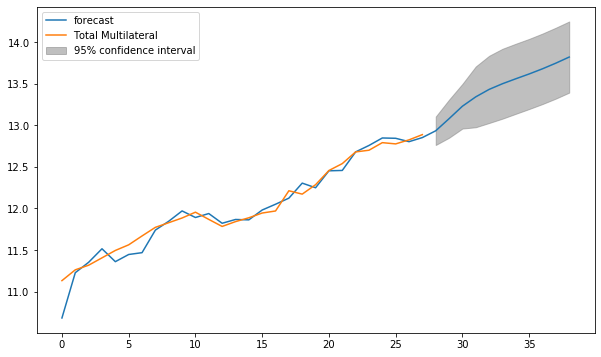

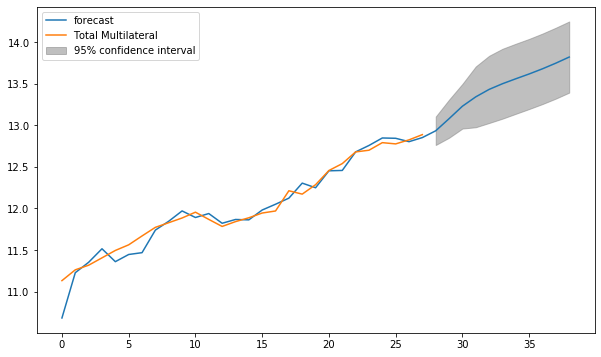

In [104]:
results_ARIMA.plot_predict(1,39)

In [106]:
output = results_ARIMA.forecast(steps=10)

In [ ]:
results_ARIMA.